In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
import pandas as pd
import quandl
import numpy as np
from datetime import date

F:\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#导入数据
data_142=pd.read_csv('142_data_15minutes.csv')
print(data_142.shape)
data_142.head()

(17664, 8)


,dataid,local_15min,Unnamed: 2,clotheswasher_dryg1,dishwasher1,freezer1,grid,heater1
0,142,2019-05-01 00:00:00-05,NaN,0.001,0.0,0.654,0.785,0.008
1,142,2019-05-01 00:15:00-05,NaN,0.001,0.0,0.659,0.839,0.008
2,142,2019-05-01 00:30:00-05,NaN,0.001,0.0,0.686,0.909,0.008
3,142,2019-05-01 00:45:00-05,NaN,0.001,0.0,0.715,0.846,0.008
4,142,2019-05-01 01:00:00-05,NaN,0.001,0.0,0.660,0.792,0.008


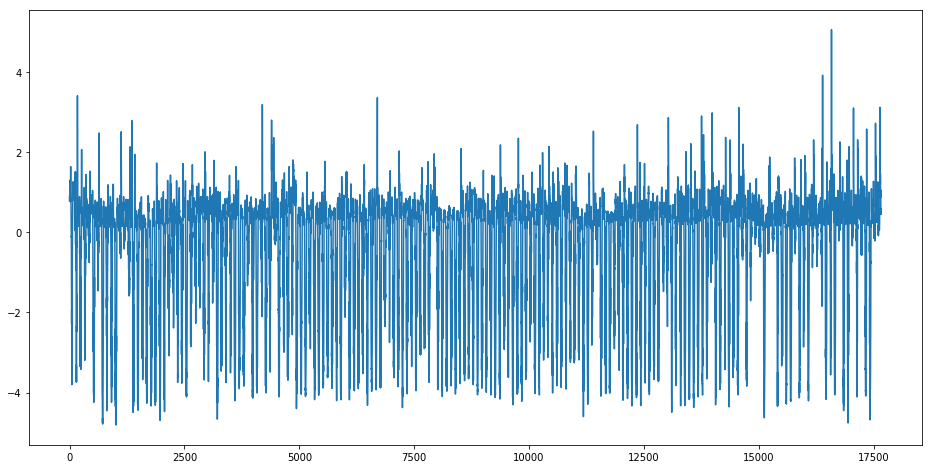

In [3]:
plt.figure(figsize=(16,8))
plt.plot(data_142['grid'])
plt.show()

# 构建训练集以及验证集

In [4]:
time_stamp=24
#划分训练集与验证集
data_input=data_142[['grid','heater1']]
train = data_input[0:17568+ time_stamp]
valid = data_input[17568 - time_stamp:]
#归一化
scaler = MinMaxScaler(feature_range=(0, 1))  
scaled_data = scaler.fit_transform(train)
x_train, y_train = [], []
# 训练集
for i in range(time_stamp, len(train)):
    x_train.append(scaled_data[i - time_stamp:i])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape,y_train.shape)
x_train[1]



(17568, 24, 2) (17568,)


array([[0.57239842, 0.0045045 ],
       [0.57949134, 0.0045045 ],
       [0.57310771, 0.0045045 ],
       [0.56763603, 0.0045045 ],
       [0.56804134, 0.0045045 ],
       [0.57989665, 0.0045045 ],
       [0.57918735, 0.0045045 ],
       [0.56783869, 0.0045045 ],
       [0.57310771, 0.0045045 ],
       [0.5789847 , 0.        ],
       [0.58698956, 0.        ],
       [0.57077718, 0.0045045 ],
       [0.56682541, 0.0045045 ],
       [0.57027054, 0.        ],
       [0.57138515, 0.        ],
       [0.62002229, 0.0045045 ],
       [0.58982673, 0.4009009 ],
       [0.57462762, 0.        ],
       [0.57260107, 0.11711712],
       [0.58151788, 0.23873874],
       [0.58253116, 0.40540541],
       [0.62093424, 0.40990991],
       [0.6522444 , 0.63963964],
       [0.63876786, 0.58108108]])

In [5]:
#验证集
scaled_data = scaler.fit_transform(valid)
x_valid, y_valid = [], []
for i in range(time_stamp, len(valid)):
    x_valid.append(scaled_data[i - time_stamp:i])
    y_valid.append(scaled_data[i, 0])

x_valid, y_valid = np.array(x_valid), np.array(y_valid)
print(x_valid.shape,y_valid.shape)

(96, 24, 2) (96,)


# 创建并训练模型

In [6]:
# 超参数
epochs = 10
batch_size = 32
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_dim=x_train.shape[-1], input_length=x_train.shape[1]))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

F:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=100, return_sequences=True, input_shape=(24, 2))`
  """


Epoch 1/10
17568/17568 [==============================] - 19s 1ms/step - loss: 0.0055
Epoch 2/10
17568/17568 [==============================] - 18s 1ms/step - loss: 0.0026
Epoch 3/10
17568/17568 [==============================] - 18s 1ms/step - loss: 0.0021: 0s - l
Epoch 4/10
17568/17568 [==============================] - 20s 1ms/step - loss: 0.0020
Epoch 5/10
17568/17568 [==============================] - 20s 1ms/step - loss: 0.0019
Epoch 6/10
17568/17568 [==============================] - 23s 1ms/step - loss: 0.0019
Epoch 7/10
17568/17568 [==============================] - 21s 1ms/step - loss: 0.0019
Epoch 8/10
17568/17568 [==============================] - 19s 1ms/step - loss: 0.0019
Epoch 9/10
17568/17568 [==============================] - 21s 1ms/step - loss: 0.0019
Epoch 10/10
17568/17568 [==============================] - 21s 1ms/step - loss: 0.0019


# 预测模型

In [7]:
next_grid = model.predict(x_valid)
scaler.fit_transform(pd.DataFrame(valid['grid'].values))
# 反归一化
next_grid = scaler.inverse_transform(next_grid)
y_valid = scaler.inverse_transform([y_valid])

# 拟合趋势

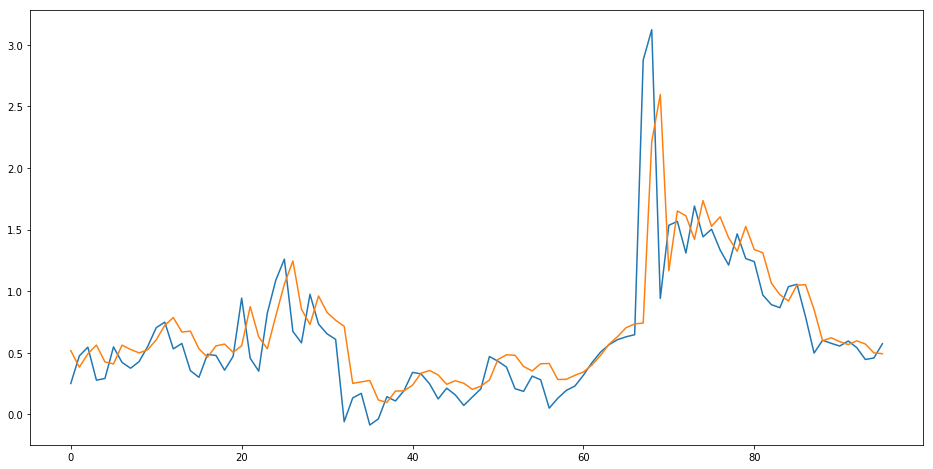

In [8]:
plt.figure(figsize=(16, 8))
dict_data = {
    'Predictions': next_grid.reshape(1,-1)[0],
    'Grid': y_valid[0]
}
data_pd = pd.DataFrame(dict_data)

plt.plot(data_pd[['Grid', 'Predictions']])
plt.show()